Explained Variance Ratio:
  PC1: 0.309901
  PC2: 0.235994

Feature Contribution to Principal Components:
                      PC1       PC2
flow_duration    0.008810  0.039471
Rate            -0.004886 -0.047354
Srate           -0.004886 -0.047354
IAT              0.538376 -0.203868
Radius           0.236468  0.520532
Magnitue         0.160318  0.517734
Variance         0.211384  0.513155
Number           0.538013 -0.206934
Weight           0.538252 -0.206971
ack_flag_number  0.067457  0.253785


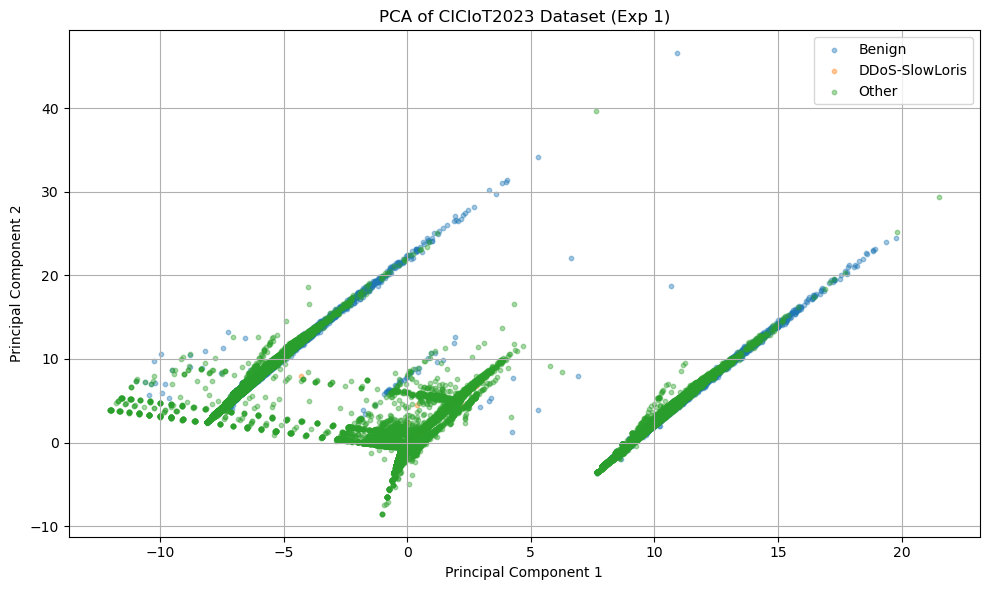

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv("preprocessed_CICIoT2023.csv")

# 2. Define label groups
def label_group(label):
    if label == "BenignTraffic":
        return "Benign"
    elif label == "DDoS-SlowLoris":
        return "DDoS-SlowLoris"
    else:
        return "Other"

df["Category"] = df["label"].apply(label_group)

# 3. Select features
features = [
    "flow_duration", "Rate", "Srate", "IAT", "Radius", "Magnitue", 
    "Variance", "Number", "Weight", "ack_flag_number"
]
X = df[features]
y = df["Category"]

# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. PCA (2D) for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
for i, var in enumerate(explained_variance):
    print(f"  PC{i+1}: {var:.6f}")

# PCA Component Loadings
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=["PC1", "PC2"],
    index=features
)
print("\nFeature Contribution to Principal Components:")
print(loadings)

# 6. Plot PCA
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Category"] = y.values

plt.figure(figsize=(10, 6))
for cat in ["Benign", "DDoS-SlowLoris", "Other"]:
    plt.scatter(
        pca_df[pca_df["Category"] == cat]["PC1"],
        pca_df[pca_df["Category"] == cat]["PC2"],
        label=cat,
        alpha=0.4,
        s=10
    )
plt.title("PCA of CICIoT2023 Dataset (Exp 1)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("PCA_CICIoT2023_Exp1.png", dpi=300)
plt.show()

Explained Variance Ratio:
  PC1: 0.309901
  PC2: 0.235994

Feature Contribution to Principal Components:
                      PC1       PC2
flow_duration    0.008810  0.039471
Rate            -0.004886 -0.047354
Srate           -0.004886 -0.047354
IAT              0.538376 -0.203868
Radius           0.236468  0.520532
Magnitue         0.160318  0.517734
Variance         0.211384  0.513155
Number           0.538013 -0.206934
Weight           0.538252 -0.206971
ack_flag_number  0.067457  0.253785


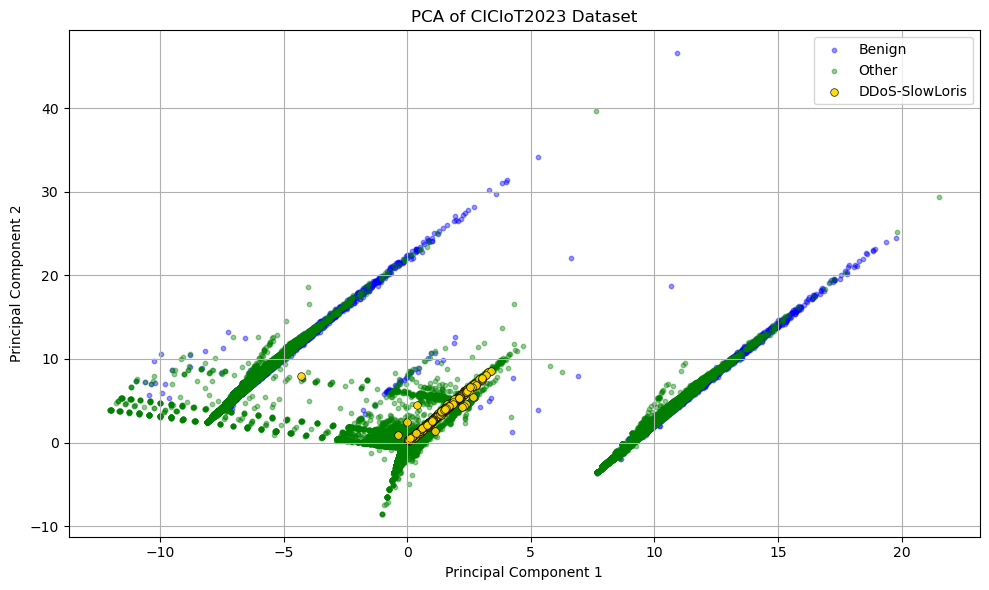

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv("preprocessed_CICIoT2023.csv")

# 2. Define label groups
def label_group(label):
    if label == "BenignTraffic":
        return "Benign"
    elif label == "DDoS-SlowLoris":
        return "DDoS-SlowLoris"
    else:
        return "Other"

df["Category"] = df["label"].apply(label_group)

# 3. Select features
features = [
    "flow_duration", "Rate", "Srate", "IAT", "Radius", "Magnitue", 
    "Variance", "Number", "Weight", "ack_flag_number"
]
X = df[features]
y = df["Category"]

# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. PCA (2D) for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
for i, var in enumerate(explained_variance):
    print(f"  PC{i+1}: {var:.6f}")

# PCA Component Loadings
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=["PC1", "PC2"],
    index=features
)
print("\nFeature Contribution to Principal Components:")
print(loadings)

# 6. Plot PCA (with DDoS-SlowLoris on top in yellow)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Category"] = y.values

plt.figure(figsize=(10, 6))

# Set color map
color_map = {
    "Benign": "blue",
    "Other": "green",
    "DDoS-SlowLoris": "gold"  # bright yellow
}

# Plot Benign and Other first
for cat in ["Benign", "Other"]:
    subset = pca_df[pca_df["Category"] == cat]
    plt.scatter(
        subset["PC1"], subset["PC2"],
        label=cat,
        alpha=0.4,
        s=10,
        c=color_map[cat]
    )

# Plot DDoS-SlowLoris last and bigger
slowloris = pca_df[pca_df["Category"] == "DDoS-SlowLoris"]
plt.scatter(
    slowloris["PC1"], slowloris["PC2"],
    label="DDoS-SlowLoris",
    alpha=0.9,
    s=30,
    c=color_map["DDoS-SlowLoris"],
    edgecolors='black',
    linewidths=0.5
)

# Finalize plot
plt.title("PCA of CICIoT2023 Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("PCA_CICIoT2023_Exp1.png", dpi=300)
plt.show()

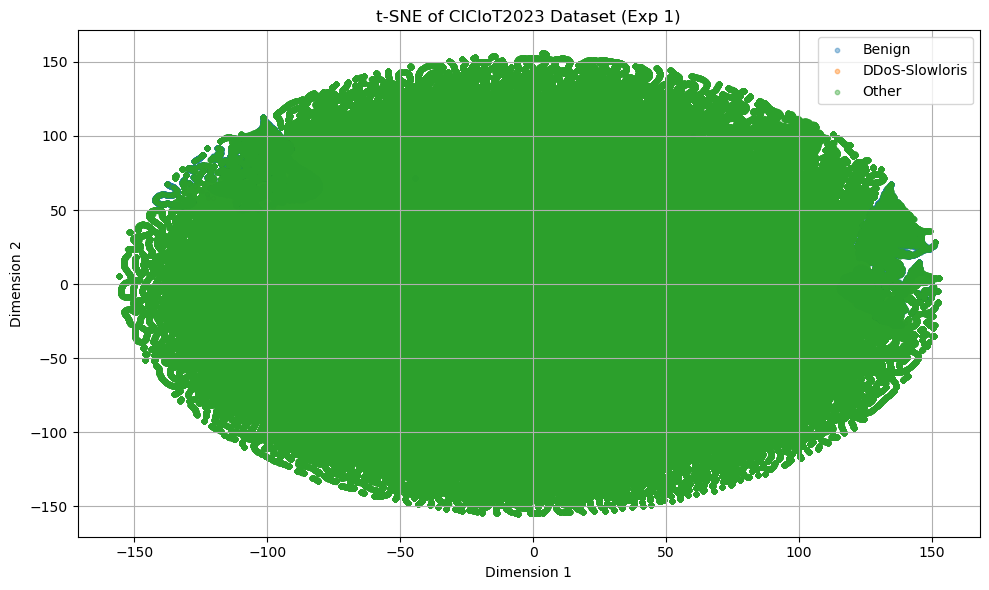

In [ ]:
# Match the number of features
n_components_tsne_pca = min(10, X_scaled.shape[1])

# 7. PCA (<= 10D) before t-SNE
pca_tsne = PCA(n_components=n_components_tsne_pca, random_state=42)
X_pca_tsne = pca_tsne.fit_transform(X_scaled)

# 8. Faster t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_pca_tsne)

# 9. Plot t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["Category"] = y.values

plt.figure(figsize=(10, 6))
for cat in ["Benign", "DDoS-Slowloris", "Other"]:
    plt.scatter(
        tsne_df[tsne_df["Category"] == cat]["Dim1"],
        tsne_df[tsne_df["Category"] == cat]["Dim2"],
        label=cat,
        alpha=0.4,
        s=10
    )
plt.title("t-SNE of CICIoT2023 Dataset (Exp 1)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("tSNE_CICIoT2023_Exp1.png", dpi=300)
plt.show()

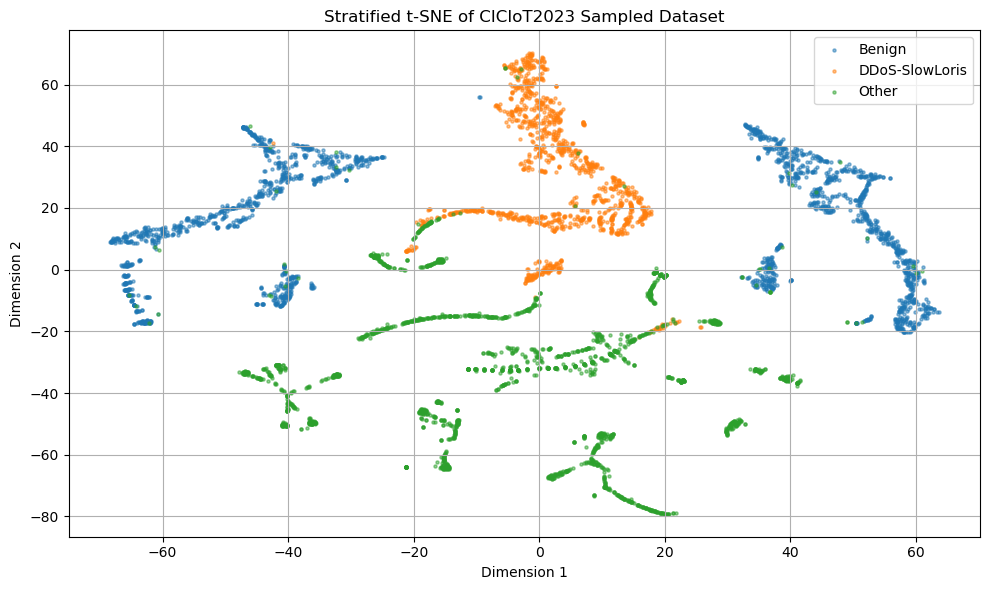

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv("preprocessed_CICIoT2023.csv")

# 2. Define label groups
def label_group(label):
    if label == "BenignTraffic":
        return "Benign"
    elif label == "DDoS-SlowLoris":
        return "DDoS-SlowLoris"
    else:
        return "Other"

df["Category"] = df["label"].apply(label_group)

# 3. Select features
features = [
    "flow_duration", "Rate", "Srate", "IAT", "Radius", "Magnitue", 
    "Variance", "Number", "Weight", "ack_flag_number"
]
X = df[features]
y = df["Category"]

# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Stratified Sampling: up to N samples per class
max_samples_per_class = 2000  # adjust as needed
sampled_list = []

for label, group in df.groupby("Category"):
    n = min(len(group), max_samples_per_class)
    sampled_group = group.sample(n=n, random_state=42)
    sampled_list.append(sampled_group)

df_sampled = pd.concat(sampled_list).reset_index(drop=True)

# Extract features/labels for sampled data
X_sample = scaler.transform(df_sampled[features])
y_sample = df_sampled["Category"]

# 6. PCA for t-SNE preprocessing
pca_tsne = PCA(n_components=min(10, X_sample.shape[1]), random_state=42)
X_pca_tsne = pca_tsne.fit_transform(X_sample)

# 7. t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_pca_tsne)

# 8. Plot t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["Category"] = y_sample.values

plt.figure(figsize=(10, 6))
for cat in ["Benign", "DDoS-SlowLoris", "Other"]:
    subset = tsne_df[tsne_df["Category"] == cat]
    plt.scatter(subset["Dim1"], subset["Dim2"], label=cat, alpha=0.5, s=5)

plt.title("Stratified t-SNE of CICIoT2023 Sampled Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("tSNE_CICIoT2023_Stratified.png", dpi=300)
plt.show()

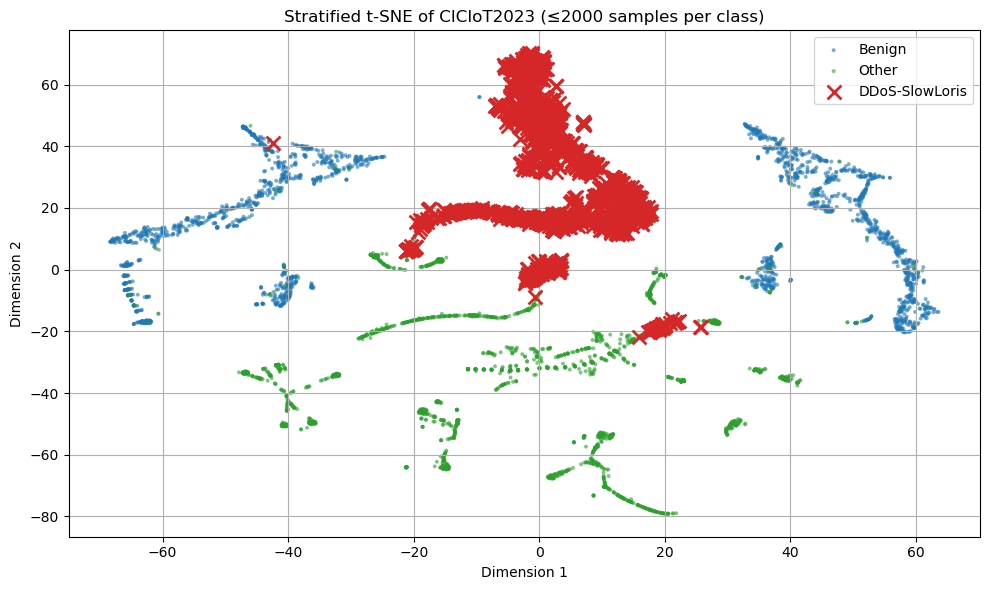

Slowloris sample count: 1176


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv("preprocessed_CICIoT2023.csv")

# 2. Define label groups
def label_group(label):
    if label == "BenignTraffic":
        return "Benign"
    elif label == "DDoS-SlowLoris":
        return "DDoS-SlowLoris"
    else:
        return "Other"

df["Category"] = df["label"].apply(label_group)

# 3. Select features
features = [
    "flow_duration", "Rate", "Srate", "IAT", "Radius", "Magnitue", 
    "Variance", "Number", "Weight", "ack_flag_number"
]
X = df[features]
y = df["Category"]

# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Stratified Sampling: up to N samples per class
max_samples_per_class = 2000
sampled_list = []
for label, group in df.groupby("Category"):
    n = min(len(group), max_samples_per_class)
    sampled_group = group.sample(n=n, random_state=42)
    sampled_list.append(sampled_group)

df_sampled = pd.concat(sampled_list).reset_index(drop=True)

# Extract features/labels for sampled data
X_sample = scaler.transform(df_sampled[features])
y_sample = df_sampled["Category"]

# 6. PCA before t-SNE
#pca_tsne = PCA(n_components=min(10, X_sample.shape[1]), random_state=42)
pca_tsne = PCA(n_components=min(10, X_sample.shape[1]))
X_pca_tsne = pca_tsne.fit_transform(X_sample)

# 7. t-SNE
#tsne = TSNE(n_components=2, perplexity=100, n_iter=2000, init='pca', random_state=42)
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_pca_tsne)

# 8. Prepare t-SNE DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["Category"] = y_sample.values

# 9. Enhanced Visualization Settings
color_map = {
    "Benign": "#1f77b4",           # blue
    "DDoS-SlowLoris": "#d62728",   # red
    "Other": "#2ca02c"             # green
}

plt.figure(figsize=(10, 6))

# Plot Benign and Other (circles)
for cat in ["Benign", "Other"]:
    subset = tsne_df[tsne_df["Category"] == cat]
    plt.scatter(
        subset["Dim1"], subset["Dim2"],
        label=cat,
        alpha=0.6,
        s=8,
        c=color_map[cat],
        edgecolors='none'
    )

# Plot DDoS-Slowloris (X marker)
slowloris = tsne_df[tsne_df["Category"] == "DDoS-SlowLoris"]
plt.scatter(
    slowloris["Dim1"], slowloris["Dim2"],
    label="DDoS-SlowLoris",
    marker="x",
    c=color_map["DDoS-SlowLoris"],
    s=100,             # 更大
    linewidths=2,      # 更粗
    zorder=10          # 放在最上层
)

# Labels and styling
plt.title("Stratified t-SNE of CICIoT2023 (≤2000 samples per class)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("tSNE_CICIoT2023_Stratified_Enhanced.png", dpi=300)
plt.show()

print("Slowloris sample count:", len(slowloris))